# Punto 3


Para el desarrollo del siguiente punto se utilizo el dataset de Employee Atrittion: https://www.kaggle.com/HRAnalyticRepository/employee-attrition-data.

El dataset contiene información ficticio de empleados que se encuentran activos y empleados que se han retirado. Donde el objetivo es determinar si los retiros indiciduales de empleados puede ser predecido con la información del dataset.

En primer lugar, para el desarrollo de este punto del taller se importan las librerrias a utilizar en el desarrollo del modelo.

In [444]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

Se lee el archivo .csv, la ruta se ajusta de acuerdo a donde tengan el dataset guardado

In [445]:
df = pd.read_excel('C:/Users/Usuario/Documents/Universidad/Machine Learning/Taller 1/Conjuntos de Datos_Taller_1 (1)/Datos_Employee Attrition/WA_Fn-UseC_-HR-Employee-Attrition.xlsx', header=0)

Se procede a ver los campos del dataset para así verificar que se hayan cargado correctamente.

In [446]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [447]:
list(df)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

La variable objetivo en este caso corresponde a la variable attrition. Seguidamente se procede a realizar la separación de los conjuntos de datos de entrenamiento y de testing.

En este caso se generan dos variables, un grupo para entrenamiento train y otro grupo para probar test. En test_size se utiliza 0,3, esto quiere decir que el 70% de las instancias van a ser para entrenar el modelo y el 30% para implementar. 

In [448]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

Seguidamente, see raliza un análisis descriptivo con pandas profiling En este análisis generado se puede observar la descripción de cada variable y sus propiedades (en la opción "Toggle details") como estadísticas e histograma de distribución. Para las variables categóricas se observa la distribución por cada categoría. Esto se hace solo para el conjunto test.

In [449]:
pandas_profiling.ProfileReport(train)

De igual forma, se listan los tipos de cada variable.

In [450]:
train.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Después de realizar el análisis, es posible ver que el conjunto de datos no cuenta con faltantes, se tiene un total de 1470 registros y 35 variables.Se cuenta con 24 variables númericas, 2 booleanas y 9 númericas, ahora bien, a pesar de que hay algortimos de arboles que si pueden trabajar tanto con variables númericas como con variables categóricas, se va a utilizar la version optimizada de CART que utiliza scikit-learn, la cual no soporta el uso de variables categóricas.

Por otra parte, se encuentran una serie de variables que presentan un valor constante dentro de todo el conjunto de datos. Estas variables son: EmployeeCount con un valor de 1, Over18 con un valor de "Y" y StandardHours con un valor de 80. Se toma la decisión de eliminar estas variables, pues no contienen información representativa para el modelo. De igual forma se decide eliminar MonthlyIncome por su alta correlación y Employee number, pues esta última corresponde a un número de identificación para el empleado, información que no es relevante para el modelo de clasificación.

Adicionalmente, en el análisis se encuentra que la clase (attrition) se encuentra bastante desbalanceada con un 82.9% de datos para la clase negativa y un 17.1% para la clase positiva.

Se procede a eliminar del dataset la variables EmployeeCount, Over18, StandardHours y MonthlyIncome.

In [451]:
train = train.drop(columns=['EmployeeCount'], axis=1)

In [452]:
train = train.drop(columns=['Over18'], axis=1)

In [453]:
train = train.drop(columns=['StandardHours'], axis=1)

In [454]:
train = train.drop(columns=['MonthlyIncome'], axis=1)

In [455]:
train = train.drop(columns=['EmployeeNumber'], axis=1)

In [456]:
list(train)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Como está el dataset, aún no está listo para el modelo a generar. Se prepara el dataset volviendo las variables categoricas en numéricas (aquellas con tipo object en la lista de datos), mediante una técnica que es variables dummies, ya que el algoritmo a utilizar sólo recibe variables con valores númericos. La variable objetivo 'Attrition' se vuelve numérica asignando 1 a la categoría positiva y 0 a la categoría negativa.

In [457]:
train['Attrition'].value_counts()

No     853
Yes    176
Name: Attrition, dtype: int64

In [458]:
train['Attrition'] = np.where(train['Attrition']=='No',0,np.where(train['Attrition']=='Yes',1,'na'))

In [459]:
train['Attrition'].value_counts()

0    853
1    176
Name: Attrition, dtype: int64

In [460]:
train_dummies = pd.get_dummies(train, columns=['BusinessTravel','Gender','Department','EducationField','JobRole','MaritalStatus','OverTime'])

In [461]:
list(train_dummies)

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Gender_Female',
 'Gender_Male',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole

Ahora bien, se procede a organizar los conjuntos de train para poder realizar la validación cruzada.

In [462]:
X_train = train_dummies.drop(columns=['Attrition'], axis=1)

In [463]:
y_train = train_dummies['Attrition']

Seguidamente se procede a preparar el conjunto de datos de test, realizando las mismas transformaciones realizadas al conjunto de entrenamiento.

In [464]:
test = test.drop(columns=['EmployeeCount'], axis=1)

In [465]:
test = test.drop(columns=['Over18'], axis=1)

In [466]:
test = test.drop(columns=['StandardHours'], axis=1)

In [467]:
test = test.drop(columns=['MonthlyIncome'], axis=1)

In [468]:
test = test.drop(columns=['EmployeeNumber'], axis=1)

In [469]:
list(test)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [470]:
test['Attrition'].value_counts()

No     380
Yes     61
Name: Attrition, dtype: int64

In [471]:
test['Attrition'] = np.where(test['Attrition']=='No',0,np.where(test['Attrition']=='Yes',1,'na'))

In [472]:
test['Attrition'].value_counts()

0    380
1     61
Name: Attrition, dtype: int64

In [473]:
test_dummies = pd.get_dummies(test, columns=['BusinessTravel','Gender','Department','EducationField','JobRole','MaritalStatus','OverTime'])

In [474]:
list(test_dummies)

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Gender_Female',
 'Gender_Male',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole

In [475]:
X_test = test_dummies.drop(columns=['Attrition'], axis=1)

In [476]:
y_test = test_dummies['Attrition']

Las variables están listas para el modelo, se procede a realizar una busqueda grid para así poder determinar una complejidad del modelo óptima. Para esto se utiliza la librería de GridSearchCV.

In [477]:
max=0;
MaxP=0;
parametros=[i for i in range(1,10,1)]
mean=[]
for j in parametros:
    clf=DecisionTreeClassifier(class_weight='balanced', max_depth=j, random_state=42)
    scoreProm=cross_val_score(clf, X_train, y_train, cv=10).mean()
    mean.append(scoreProm)
    if scoreProm > max:
        max=scoreProm
        MaxP=j


Se gráfica los valores obtenidos.

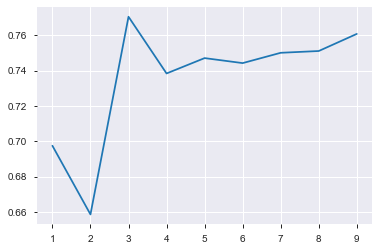

In [478]:
plt.plot(parametros, mean)

Se procede a determinar cúal debe ser la complejidad del modelo en cuanto a la altura.

In [479]:
print(MaxP)

3


Teniendo esto en cuenta se procede a utilizar el algoritmo para arboles de decision utilizando la librería DecisionTreeClassifier teniendo en cuenta la altura encontrada anteriormente y utilizando el parámetro de class_weight para así ajustar los pesos de forma inversamente proporcional a las frecuencias de la clase en los datos y así tener en cuenta que el conjunto de datos está desbalanceado.

In [480]:
Arbol = tree.DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=42)

Se entrena el modelo.

In [481]:
Arbol.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [482]:
prediccion = Arbol.predict(X_test)

In [483]:
Counter(prediccion)

Counter({'0': 360, '1': 81})

Se imprime la matriz de confusión.

In [484]:
confusion_matrix(y_test, prediccion)

array([[327,  53],
       [ 33,  28]], dtype=int64)

Se visualizan otras medidas de desempeño del modelo.

In [485]:
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       380
           1       0.35      0.46      0.39        61

    accuracy                           0.80       441
   macro avg       0.63      0.66      0.64       441
weighted avg       0.83      0.80      0.82       441



In [486]:
score=cross_val_score(Arbol, X_train, y_train)

In [487]:
print(score)

[0.84883721 0.77259475 0.68421053]


Finalmente se obtiene la exactitud promedio.

In [488]:
score.mean()

0.7685474959349013

Se procede a pintar el arbol.

[Text(167.4, 190.26, 'OverTime_Yes <= 0.5\ngini = 0.5\nsamples = 1029\nvalue = [514.5, 514.5]'),
 Text(83.7, 135.9, 'TotalWorkingYears <= 2.5\ngini = 0.463\nsamples = 731\nvalue = [394.47, 225.094]'),
 Text(41.85, 81.53999999999999, 'Age <= 34.5\ngini = 0.402\nsamples = 66\nvalue = [25.936, 67.236]'),
 Text(20.925, 27.180000000000007, 'gini = 0.358\nsamples = 57\nvalue = [20.508, 67.236]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 9\nvalue = [5.428, 0.0]'),
 Text(125.55000000000001, 81.53999999999999, 'StockOptionLevel <= 0.5\ngini = 0.42\nsamples = 665\nvalue = [368.534, 157.858]'),
 Text(104.625, 27.180000000000007, 'gini = 0.488\nsamples = 251\nvalue = [131.49, 96.469]'),
 Text(146.475, 27.180000000000007, 'gini = 0.327\nsamples = 414\nvalue = [237.044, 61.389]'),
 Text(251.10000000000002, 135.9, 'JobLevel <= 1.5\ngini = 0.414\nsamples = 298\nvalue = [120.03, 289.406]'),
 Text(209.25, 81.53999999999999, 'Age <= 30.5\ngini = 0.25\nsamples = 121\nvalue = [3

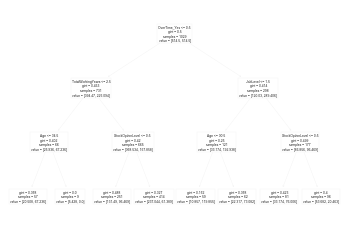

In [489]:
tree.plot_tree(Arbol, feature_names=X_train.columns)

Finalmente se puede concluir que las variables relevantes en la determinación de si un empleado se va a retirar o no de su trabajo corresponden a OverTime, TotalWorkingYears, Age, StockOptionLevel y JobLevel. Con el arbol de decisión obtenido se obtiene una precisión del 91% para la clase negativa y 35% para la clase positiva obteniendo un valor de exactitud global de 80%. Los valores de precisión obtenidos muestran que el modelo no está logrando aprenderse correctamente la clase negativa. Esto se puede deber a que se cuenta con muy pocos datos de esta clase, es decir la clase está desbalanceada. 